Connor Marrs
June 8th 2022

This notebook contains solutions to the computational exercises in Louis Arguin's
Introduction to Stochastic Calculus

Exercise 1: Simulate 100 paths of Brownian Motion

In [ ]:
# Importing Packages
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def cov_brownian_motion(x,y,H):
  return min(x,y)

def cov_fract_brownian_motion(x,y,H):
  return x**(2*H)+y**(2*H)-abs(x-y)**(2*H)

def create_path(cov_function,H,N):
  # compute the covariance matrix
  cov_matrix = np.array(
      [[ cov_function(.01*i,.01*j,H) for j in range(1,N+1)] for i in range(1,N+1)]
  )

  # compute cholesky decomposition of covariance matrix above
  arraya = np.linalg.cholesky(cov_matrix)

  # use np.random to generate an n-vector sampled from N(0,1)
  stand_vec=np.random.standard_normal(N) 

  # compute path x=Az where z is stand_vec
  walk = np.matmul(arraya,stand_vec)
  
  # recall that B(0)=0 so set first position to 0 and return
  return np.insert(walk,0,0)



Text(0.5, 1.0, 'FBM H = 0.9')

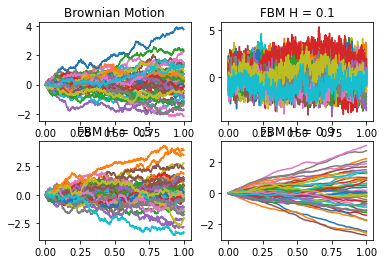

In [ ]:
# Plotting the paths for Brownian Motion
time = np.arange(0.0,1.01,0.01)

# Make 4 subplots - 3 for the various fractional BM's and one for BM
figure, axis = plt.subplots(2, 2)

trials = 50

# Plot Brownian Motion
for j in range(0,trials):
  axis[0,0].plot(time,create_path(cov_brownian_motion,1,100))
axis[0,0].set_title("Brownian Motion")

# Plot Fractional Brownian Motion, H = 0.1
for j in range(0,trials):
  axis[0,1].plot(time,create_path(cov_fract_brownian_motion,0.1,100))
axis[0,1].set_title("FBM H = 0.1")

# Plot Fractional Brownian Motion, H = 0.5
for j in range(0,trials):
  axis[1,0].plot(time,create_path(cov_fract_brownian_motion,0.5,100))
axis[1,0].set_title("FBM H = 0.5")

# Plot Fractional Brownian Motion, H = 0.9
for j in range(0,trials):
  axis[1,1].plot(time,create_path(cov_fract_brownian_motion,0.9,100))
axis[1,1].set_title("FBM H = 0.9")


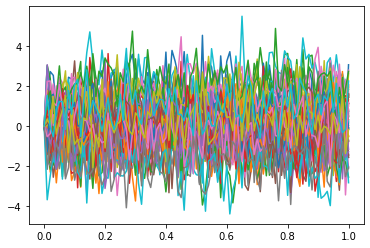

In [ ]:
# Plotting the paths for Brownian Motion
time = np.arange(0.0,1.01,0.01)

# Make 4 subplots - 3 for the various fractional BM's and one for BM

trials = 50

# Plot Fractional Brownian Motion, H = 0.01
for j in range(0,trials):
  plt.plot(time,create_path(cov_fract_brownian_motion,0.01,100))